In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings


In [2]:
df=pd.read_csv("autos_dataset.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### problem statement

Predict the car price from the given data

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [7]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

##### Here is ? present so we have to replace it with mean or median

In [9]:
df.replace({"?":np.nan},inplace=True)  # replace ? with nan value

In [10]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
df["normalized-losses"].median()

115.0

In [12]:
df["normalized-losses"].fillna(df["normalized-losses"].median(),inplace=True)

In [13]:
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0],inplace=True)

In [14]:
df["bore"].fillna(df["bore"].median(),inplace=True)

In [15]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [16]:
df["stroke"].fillna(df["stroke"].median(),inplace=True)

In [17]:
df["horsepower"].fillna(df["horsepower"].median(),inplace=True)

In [18]:
df["peak-rpm"].median()

5200.0

In [19]:
df["peak-rpm"].fillna(df["peak-rpm"].median(),inplace=True)

In [20]:
df["price"].value_counts()

8921     2
18150    2
8845     2
8495     2
7609     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 186, dtype: int64

In [21]:
df["price"].median()

10295.0

In [22]:
df["price"].fillna(df["price"].median(),inplace=True)

In [23]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Outlier handling

<AxesSubplot:>

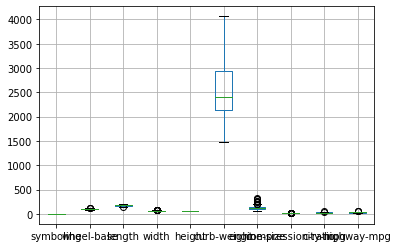

In [24]:
df.boxplot(figsize=(12,6))

<AxesSubplot:>

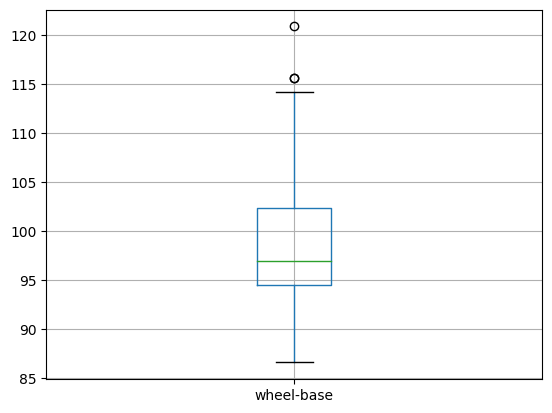

In [25]:
df[["wheel-base"]].boxplot()

In [26]:
z_score_value=np.abs(zscore(df["wheel-base"]))
z_score_value
df[["wheel-base"]].loc[z_score_value>2]
array=np.where(z_score_value>2)
array
array1=df["wheel-base"].to_numpy()
array1[array]=df["wheel-base"].median()


<AxesSubplot:>

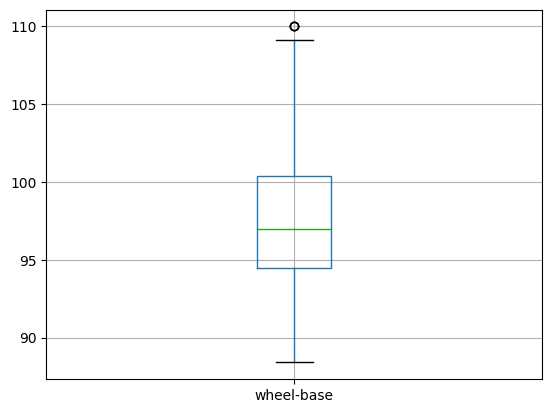

In [27]:
df[["wheel-base"]].boxplot()

<AxesSubplot:>

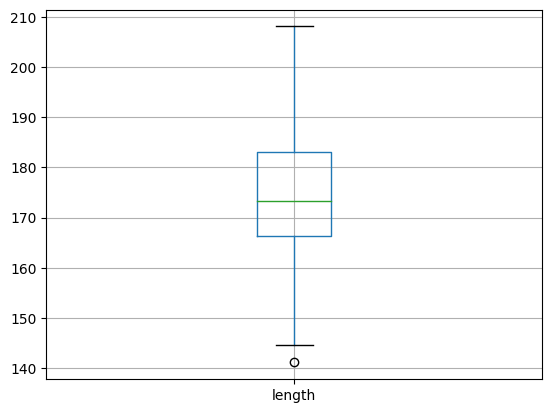

In [28]:
df[["length"]].boxplot()

In [29]:
# z_score_value=np.abs(zscore(df["length"]))
# z_score_value
# df[["length"]].loc[z_score_value>2]
# array=np.where(z_score_value>2)
# array
# array1=df["length"].to_numpy()
# array1[array]=df["length"].median()


<AxesSubplot:>

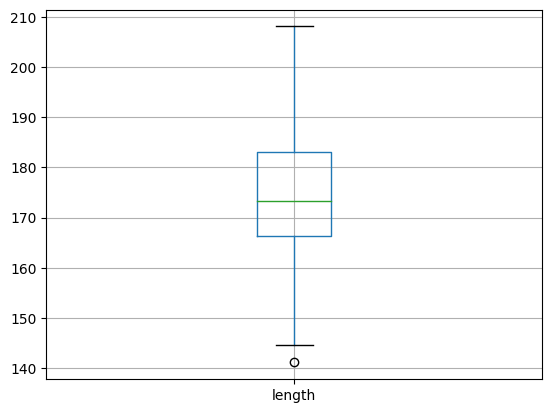

In [30]:
df[["length"]].boxplot()

In [31]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<AxesSubplot:>

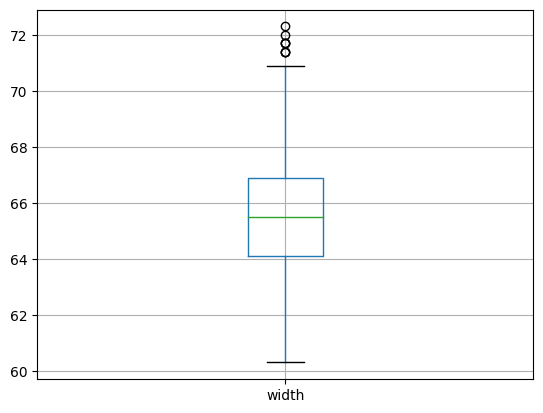

In [32]:
df[["width"]].boxplot()

In [33]:
z_score_value=np.abs(zscore(df["width"]))
z_score_value
df[["width"]].loc[z_score_value>2]
array=np.where(z_score_value>2)
array
array1=df["width"].to_numpy()
array1[array]=df["width"].median()


<AxesSubplot:>

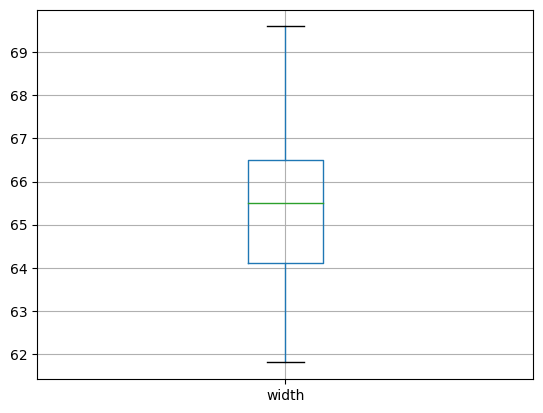

In [34]:
df[["width"]].boxplot()

<AxesSubplot:>

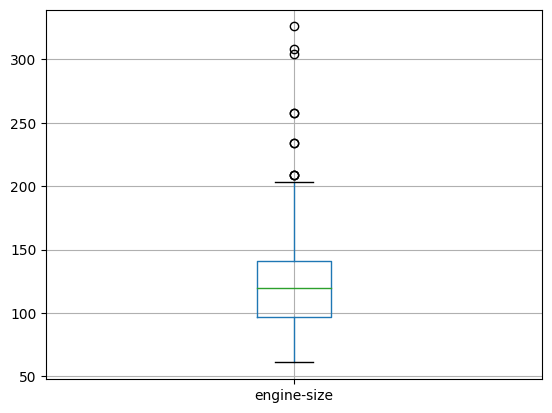

In [35]:
df[["engine-size"]].boxplot()

In [36]:
z_score_value=np.abs(zscore(df["engine-size"]))
z_score_value
df[["engine-size"]].loc[z_score_value>2]
array=np.where(z_score_value>2)
array
array1=df["engine-size"].to_numpy()
array1[array]=df["engine-size"].median()


<AxesSubplot:>

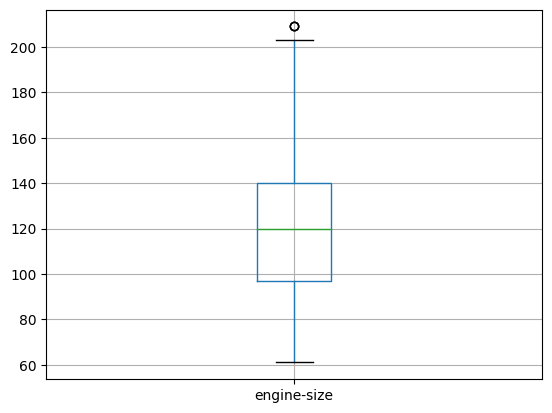

In [37]:
df[["engine-size"]].boxplot()

<AxesSubplot:>

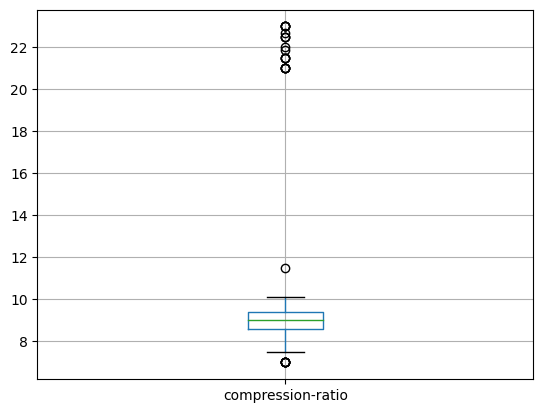

In [38]:
df[["compression-ratio"]].boxplot()

In [39]:
z_score_value=np.abs(zscore(df["compression-ratio"]))
z_score_value
df[["compression-ratio"]].loc[z_score_value>2]
array=np.where(z_score_value>2)
array
array1=df["compression-ratio"].to_numpy()
array1[array]=df["compression-ratio"].median() 


<AxesSubplot:>

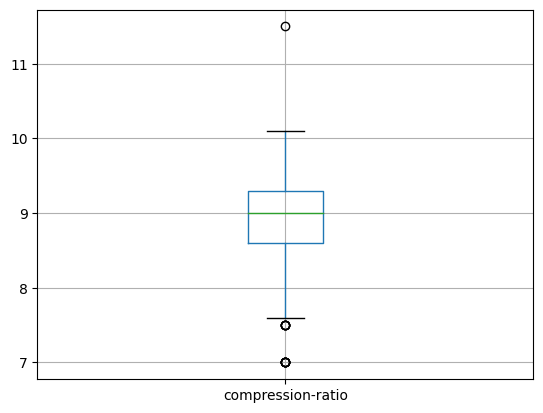

In [40]:
df[["compression-ratio"]].boxplot()

In [41]:
df.columns


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<AxesSubplot:>

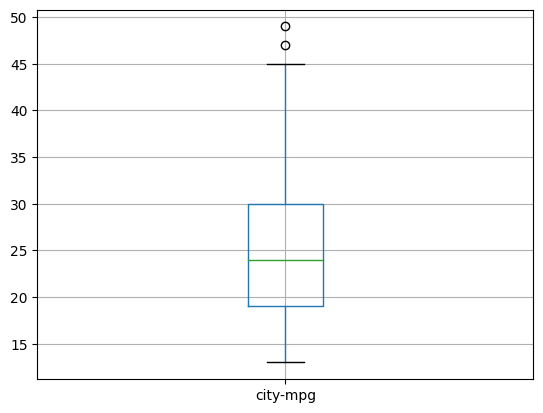

In [42]:
df[["city-mpg"]].boxplot()

<AxesSubplot:>

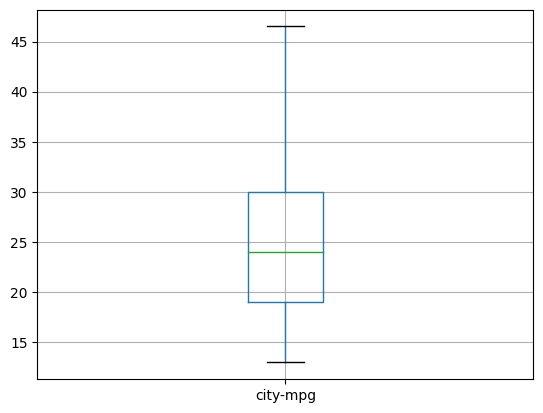

In [43]:
q1=df["city-mpg"].quantile(0.25)
q3=df["city-mpg"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit
df[["city-mpg"]].loc[df["city-mpg"]>upper_limit]
df.loc[df["city-mpg"]>upper_limit,"city-mpg"]=upper_limit
df[["city-mpg"]].boxplot()

<AxesSubplot:>

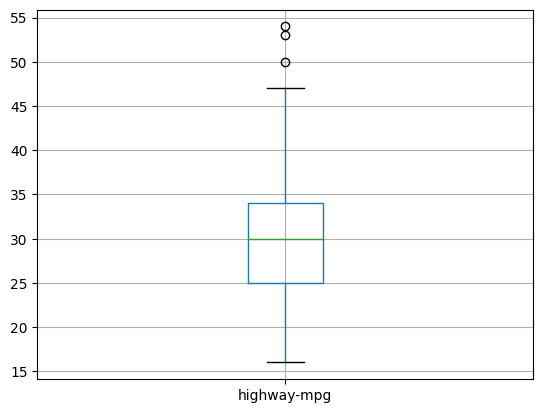

In [44]:
df[["highway-mpg"]].boxplot()

<AxesSubplot:>

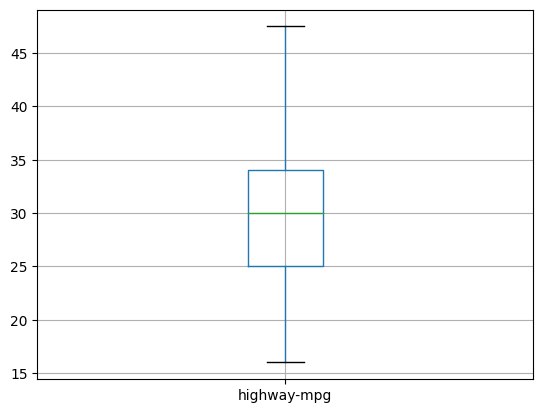

In [45]:
q1=df["highway-mpg"].quantile(0.25)
q3=df["highway-mpg"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit
df[["highway-mpg"]].loc[df["highway-mpg"]>upper_limit]
df.loc[df["highway-mpg"]>upper_limit,"highway-mpg"]=upper_limit
df[["highway-mpg"]].boxplot()

In [46]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24.0,30.0,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,9.0,106,4800,26.0,27.0,22470


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [48]:
df["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', 5200.0, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [49]:
df["peak-rpm"]=df["peak-rpm"].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<AxesSubplot:>

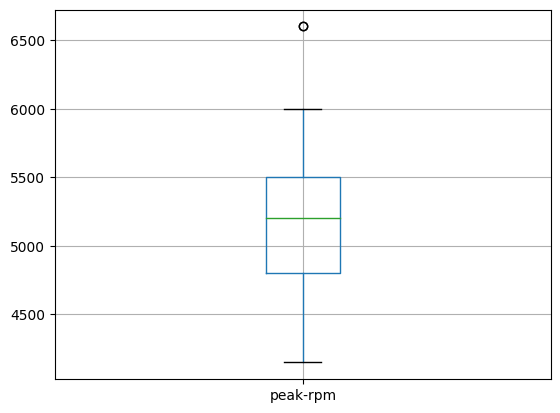

In [51]:
df[["peak-rpm"]].boxplot()

In [52]:
df["horsepower"]=df["horsepower"].astype(int)

<AxesSubplot:>

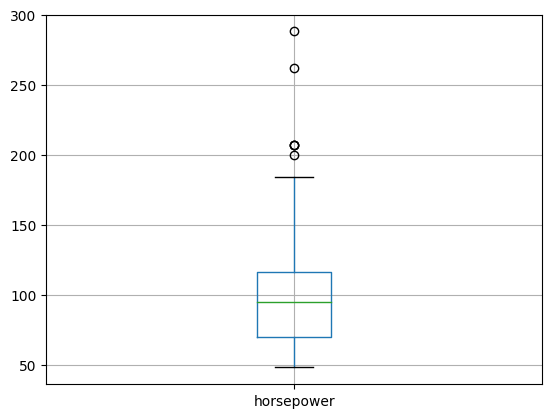

In [53]:
df[["horsepower"]].boxplot()

<AxesSubplot:>

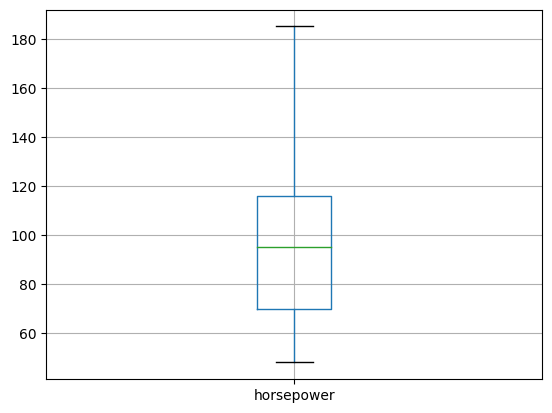

In [54]:
q1=df["horsepower"].quantile(0.25)
q3=df["horsepower"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit
df[["horsepower"]].loc[df["horsepower"]>upper_limit]
df.loc[df["horsepower"]>upper_limit,"horsepower"]=upper_limit
df[["horsepower"]].boxplot()

In [55]:
df.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495


### Encoading

In [56]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [57]:
df["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [58]:
df["fuel-type"].replace({"gas":1,"diesel":0},inplace=True)

In [59]:
dict1={"gas":1,"diesel":0}

In [60]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [61]:
df["aspiration"].replace({"std":1,"turbo":0},inplace=True)

In [62]:
dict2={"std":1,"turbo":0}

In [63]:
df["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [64]:
df["num-of-doors"].replace({"two":1,"four":0},inplace=True)

In [65]:
dict3={"two":1,"four":0}

In [66]:
df["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [67]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [68]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [69]:
df["engine-location"].replace({"front":1,"rear":0},inplace=True)

In [70]:
dict4={"front":1,"rear":0}

In [71]:
df["fuel-system"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [72]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3,115.0,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1,115.0,alfa-romero,1,1,1,hatchback,rwd,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2,164,audi,1,1,0,sedan,fwd,1,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24.0,30.0,13950
4,2,164,audi,1,1,0,sedan,4wd,1,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18.0,22.0,17450


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [74]:
df["normalized-losses"]=df["normalized-losses"].astype(int)

In [75]:
df["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [76]:
df["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [77]:
# df["stroke"]=df["stroke"].astype(int)
df["stroke"].unique()
df["stroke"]=df["stroke"].astype(float)

In [78]:
df["price"]=df["price"].astype(int)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [80]:
df=pd.get_dummies(df,columns=["fuel-system","make","body-style","drive-wheels","engine-type","num-of-cylinders","fuel-system"])

In [81]:
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,3,115,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,1,115,1,1,1,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,2,164,1,1,0,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,2,164,1,1,0,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,1,1,0,1,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,1,0,0,1,109.1,188.8,68.8,55.5,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,1,1,0,1,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,0,1,0,0
203,-1,95,0,0,0,1,109.1,188.8,68.9,55.5,...,0,0,0,0,0,1,0,0,0,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    int32  
 2   fuel-type                205 non-null    int64  
 3   aspiration               205 non-null    int64  
 4   num-of-doors             205 non-null    int64  
 5   engine-location          205 non-null    int64  
 6   wheel-base               205 non-null    float64
 7   length                   205 non-null    float64
 8   width                    205 non-null    float64
 9   height                   205 non-null    float64
 10  curb-weight              205 non-null    int64  
 11  engine-size              205 non-null    int64  
 12  bore                     205 non-null    object 
 13  stroke                   205 non-null    float64
 14  compression-ratio        2

In [83]:
df["bore"]=df["bore"].astype(float)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    int32  
 2   fuel-type                205 non-null    int64  
 3   aspiration               205 non-null    int64  
 4   num-of-doors             205 non-null    int64  
 5   engine-location          205 non-null    int64  
 6   wheel-base               205 non-null    float64
 7   length                   205 non-null    float64
 8   width                    205 non-null    float64
 9   height                   205 non-null    float64
 10  curb-weight              205 non-null    int64  
 11  engine-size              205 non-null    int64  
 12  bore                     205 non-null    float64
 13  stroke                   205 non-null    float64
 14  compression-ratio        2

### check linearity and no multicolinearity

In [85]:
k=df.corr()
k

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.457484,0.194311,0.059866,0.663595,-0.212471,-0.523691,-0.357612,-0.199957,-0.541038,...,-0.047012,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.457484,1.000000,0.104668,0.011273,0.348850,0.021510,-0.053561,-0.006837,0.106700,-0.365674,...,-0.012358,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358
fuel-type,0.194311,0.104668,1.000000,0.401397,0.188496,-0.040070,-0.264961,-0.212679,-0.182149,-0.284631,...,0.023020,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,0.059866,0.011273,0.401397,1.000000,0.052803,-0.057191,-0.265240,-0.234539,-0.309312,-0.087311,...,0.032857,0.066203,0.111748,0.323378,0.057191,-0.401397,-0.149190,0.050041,-0.394703,0.032857
num-of-doors,0.663595,0.348850,0.188496,0.052803,1.000000,-0.139129,-0.412481,-0.385675,-0.215232,-0.540286,...,0.079932,0.161052,0.097150,-0.013769,0.139129,-0.188496,0.079932,-0.035746,0.148565,0.079932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.194311,-0.104668,-1.000000,-0.401397,-0.188496,0.040070,0.264961,0.212679,0.182149,0.284631,...,-0.023020,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuel-system_mfi,0.122067,0.053844,0.023020,-0.149190,0.079932,0.008532,-0.031565,-0.004831,0.034248,-0.101245,...,-0.004902,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuel-system_mpfi,0.012532,0.179458,0.302574,0.050041,-0.035746,-0.132429,0.340767,0.511374,0.483147,0.108685,...,0.076082,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuel-system_spdi,0.181939,0.052231,0.070457,-0.394703,0.148565,0.026114,-0.116591,-0.079790,-0.014018,-0.278615,...,-0.015003,-0.030229,-0.051026,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


### train test split

In [86]:
x=df.drop("price",axis=1)
y=df["price"]

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [88]:
linear_model=LinearRegression()

In [89]:
linear_model.fit(x_train,y_train)

LinearRegression()

### evaluation matrix on testing

In [90]:
y_pred_test=linear_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_test)
print("mean absolute error is",mae)

mse=mean_squared_error(y_test,y_pred_test)
print("mean square error is",mse)

rmse=np.sqrt(mse)
print("root mean squared error is",rmse)

r2=r2_score(y_test,y_pred_test)
print("accuracy of model is",r2)


mean absolute error is 1841.8121356048307
mean square error is 6047811.118213643
root mean squared error is 2459.2297814994117
accuracy of model is 0.8766925458089483


### evaluation matrix on training

In [91]:
y_pred_train=linear_model.predict(x_train)
y_pred_train
mae=mean_absolute_error(y_train,y_pred_train)
print("mean absolute error is",mae)

mse=mean_squared_error(y_train,y_pred_train)
print("mean square error is",mse)

rmse=np.sqrt(mse)
print("root mean squared error is",rmse)

r2=r2_score(y_train,y_pred_train)
print("accuracy of model is",r2)


mean absolute error is 1224.8379023072546
mean square error is 3240534.3756852434
root mean squared error is 1800.1484315703644
accuracy of model is 0.9500827169271394


In [137]:
dfnew=pd.DataFrame()
dfnew["predicted"]=y_pred_test
y_test=y_test.reset_index(drop=True)
dfnew["actual"]=y_test
dfnew

,predicted,actual
0,13210.876870,16500
1,13553.839549,12629
2,6487.008651,5389
3,17178.030986,14399
4,40530.709477,34184
5,8942.247665,8195
6,17471.823671,19699
7,11008.044531,13295
8,19356.963135,15040
9,26404.211953,24565


<AxesSubplot:>

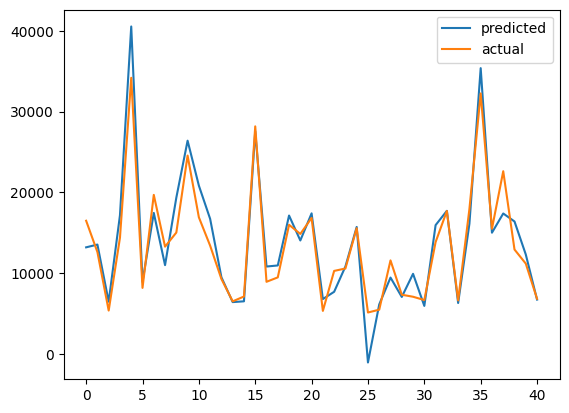

In [138]:
dfnew.plot(kind='line')

### user input

In [92]:
x.head(1).T

,0
symboling,3.0
normalized-losses,115.0
fuel-type,1.0
aspiration,1.0
num-of-doors,1.0
...,...
fuel-system_idi,0.0
fuel-system_mfi,0.0
fuel-system_mpfi,1.0
fuel-system_spdi,0.0


In [93]:
print(dict1)
print(dict2)
print(dict3)
print(dict4)

{'gas': 1, 'diesel': 0}
{'std': 1, 'turbo': 0}
{'two': 1, 'four': 0}
{'front': 1, 'rear': 0}


In [94]:
project_data={"fuel-type":dict1,"aspiration":dict2,"num-of-doors":dict3,"engine-location":dict4,"columns":list(x.columns)}
project_data

{'fuel-type': {'gas': 1, 'diesel': 0},
 'aspiration': {'std': 1, 'turbo': 0},
 'num-of-doors': {'two': 1, 'four': 0},
 'engine-location': {'front': 1, 'rear': 0},
 'columns': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'fuel-system_1bbl',
  'fuel-system_2bbl',
  'fuel-system_4bbl',
  'fuel-system_idi',
  'fuel-system_mfi',
  'fuel-system_mpfi',
  'fuel-system_spdi',
  'fuel-system_spfi',
  'make_alfa-romero',
  'make_audi',
  'make_bmw',
  'make_chevrolet',
  'make_dodge',
  'make_honda',
  'make_isuzu',
  'make_jaguar',
  'make_mazda',
  'make_mercedes-benz',
  'make_mercury',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_plymouth',
  'make_porsche',
  'make_renault',
  'make_saab',
  'make_subaru',
  'make_toyota',


In [95]:
x.iloc[0:1,35:]

,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
x.head(1).shape

(1, 79)

In [117]:
symboling=3
normalized_losses=115
fuel_type="gas"
aspiration="turbo"
num_of_doors="two"
engine_location="front"
wheel_base=88.6
length=168.8
width=64.1
height=48
curb_weight=2548
bore=3.47
stroke=2.68
compression_ratio=9
horsepower=111
peak_rpm=5000
city_mpg=21
highway_mpg=27


fuel_system="mpfi"
make="bmw"
body_style="convertible"
drive_wheels="fwd"
engine_type="ohcv"
num_of_cylinders="six"
fuel_system="mpfi"

In [118]:
fuel_system1="fuel-system_"+fuel_system
index_value1=project_data["columns"].index(fuel_system1)
index_value1

24

In [119]:
make1="make_"+make
index_value2=project_data["columns"].index(make1)
index_value2

29

In [120]:
body_style1="body-style_"+body_style
index_value3=project_data["columns"].index(body_style1)
index_value3=project_data["columns"].index(body_style1)
index_value3

49

In [108]:
drive_wheels1="drive-wheels_"+drive_wheels
index_value4=project_data["columns"].index(drive_wheels1)
index_value4


55

In [109]:
engine_type1="engine-type_"+engine_type
index_value5=project_data["columns"].index(engine_type1)
index_value5

62

In [110]:
num_of_cylinders1="num-of-cylinders_"+num_of_cylinders
index_value6=project_data["columns"].index(num_of_cylinders1)
index_value6

67

In [111]:
fuel_system1="fuel-system_"+fuel_system
index_value7=project_data["columns"].index(fuel_system1)
index_value7

24

In [123]:
array=np.zeros(len(project_data["columns"]))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
project_data["fuel-type"][fuel_type]

1

In [124]:
array[0]=symboling
array[1]=normalized_losses
array[2]=project_data["fuel-type"][fuel_type]
array[3]=project_data["aspiration"][aspiration]
array[4]=project_data["num-of-doors"][num_of_doors]
array[5]=project_data["engine-location"][engine_location]
array[6]=wheel_base
array[7]=length
array[8]=width
array[9]=height
array[10]=curb_weight
array[11]=bore
array[12]=stroke
array[13]=compression_ratio
array[14]=horsepower
array[15]=peak_rpm
array[16]=city_mpg
array[17]=highway_mpg
array[index_value1]=1
array[index_value2]=1
array[index_value3]=1
array[index_value4]=1
array[index_value5]=1
array[index_value6]=1
array[index_value7]=1

array

array([3.000e+00, 1.150e+02, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
       8.860e+01, 1.688e+02, 6.410e+01, 4.800e+01, 2.548e+03, 3.470e+00,
       2.680e+00, 9.000e+00, 1.110e+02, 5.000e+03, 2.100e+01, 2.700e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00])

In [129]:
prediction=linear_model.predict([array])[0]
pred=np.around(prediction,2)
print("price of car is in Rs",pred)

price of car is in Rs 145071.46


C:\Program Files\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### pickle file

In [139]:
import pickle
import json
with open("linear_autos_model.pkle","wb")as f:
    pickle.dump(linear_model,f)

In [140]:
with open("project_data_autos","w")as f:
    json.dump(project_data,f)